# Лабораторная работа № 3
***

Работу выполнила:

**Нечаева Анна Анатольевна, 312298**
***


## Вариант 1

Для каждой проблемы нужно провести два статистических теста, если не сказано иное, причем первый из критериев нужно реализовать самостоятельно (считать и выводить значение статистики, критическое значение, $p-value$), в качестве второго можно воспользоваться готовой реализацией. Также нужно отдельно указывать, как формализуются $H_0$ и $H_1$ для выбранных тестов. Уровень значимости определить самостоятльно.

***
*Подготовительный этап: подключение к хранилищу данных, импорт необходимых библиотек и считывание данных из файла.*
***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
house_data = pd.read_csv('drive/MyDrive/MathStat/kc_house_data.csv')

In [ ]:
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### **1. Предположите с каким вероятностным законом распределена цена. С помощью стат. теста подтвердить / опровергнуть это предположение.**

#### Собственный статистический тест

*   Рассмотрим гистограму распределения цены

Text(0.5, 1.0, 'Source data')

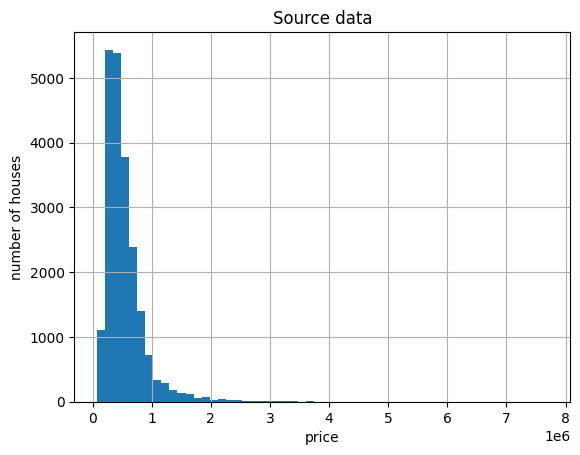

In [ ]:
plt.hist(house_data['price'], bins=56)
plt.grid()
plt.xlabel('price')
plt.ylabel('number of houses')
plt.title('Source data')

*   По виду гистограммы, можно предположить, что цены подчинены **экспоненциальному распределению**.

Формула плотности вероятности экспоненциального распределения:
$$f_X = \begin{cases} \lambda e^{-\lambda x} & x \geq 0,\\ 0 & x < 0 \end{cases}$$

*   Найдем оценку параметра $\lambda$ методом максимального правдоподобия:

   *   Запишем функцию правдоподобия: пусть дана выборка $X_1, X_2, ..., X_N$, тогда функция правдоподобия будет равна произведению плотностей вероятностей:

    $$L(\lambda) = \Pi_{i=1}^n f(X_i; \lambda) = \Pi_{i=1}^n \lambda e^{-\lambda X_i} = \lambda^n e^{-\lambda \sum_{i=1}^n X_i}$$

    *   Перейдем к логарифмической форме функции правдоподобия:
    $$l (\lambda) = \ln L(\lambda) = n \ln \lambda -\lambda \sum_{i=1}^n X_i$$

    *   Вычислим производную $l'_\lambda$ и прировняем к нулю:

    $$ (l_\lambda)' = \frac{n}{\lambda} -\sum_{i=1}^n X_i = 0 $$

    *   Из последнего получим оценку для $\lambda$:

    $$\lambda = \frac{n}{\sum_{i=1}^n X_i} = \frac{1}{\overline{X}},$$

    где $\overline{X}-$ среднее выборочное.

***


*   Построим гистограмму плотностей для цены и функцию плотности вероятности экспоненциального распределения


Text(0.5, 1.0, 'Source data and theoretical distribution')

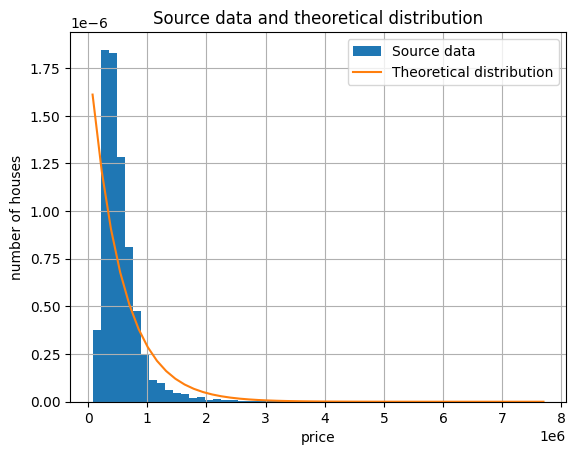

In [ ]:
import scipy.stats as sps


plt.hist(house_data['price'], bins=56, density=True, label='Source data')

lambda_1 = 1 / np.mean(house_data['price'])
mn_1 = min(house_data['price'])
mx_1 = max(house_data['price'])

x = np.linspace(mn_1, mx_1)

f_exp = sps.expon(scale=1/lambda_1).pdf(x)

plt.plot(x, f_exp, label='Theoretical distribution')

plt.legend()
plt.grid()
plt.xlabel('price')
plt.ylabel('number of houses')
plt.title('Source data and theoretical distribution')

*   Формализация $H_0$ и $H_1$
   *   Нулевая гипотеза $H_0$: распределение цены подчинено **экспоненциальному распределению**,
   *   Альтернативная гипотеза $H_1$:распределение цены не подчинено **экспоненциальному распределению**.
   *   Установим также значение **уровня значимости** $\alpha = 5\%$

* Будем применять критерий согласия Пирсона
   *   запишем формулу для статистики
   $$χ^2 = N \sum \frac{(p_i^{theor} - p_i^{emp})^2}{p_i^{theor}},$$ где $p_i^{theor}-$ предполагаемая вероятность попадания в $i-$й интервал, $p_i^{emp}=\frac{n_i}{n} -$ соответствующее эмпирическое значение, $n_i-$ число элементов выборки из $i-$го интервала.

   * *Если полученная статистика превосходит квантиль закона распределения $χ^2$ заданного уровня значимости $\alpha$ с $k-1$ или с $k-p-1$ степенями свободы, где $k-$ число наблюдений или число интервалов, а $p-$ число оцениваемых параметров закона распределения, то гипотеза $H_0$ отвергается. В противном случае гипотеза принимается на заданном уровне значимости $\alpha$.*
   ***



In [ ]:
alpha_1 = 0.05
l_1 = len(house_data['price'])
p_emp_1, int_1 = np.histogram(house_data['price'], bins=56)
k_1 = len(p_emp_1)
l_int_1 = int_1[1] - int_1[0]
p_theor_1 = l_1 * l_int_1 * sps.expon.pdf(int_1[:-1],scale=1 / lambda_1)

stat_count_1 = ((p_theor_1 - p_emp_1) ** 2 / p_theor_1).sum()

print('\u001b[34;1m Значение статистики:\u001b[36;1m',stat_count_1, '\u001b[0m')

cr_num_1 = sps.chi2.ppf(1 - alpha_1, k_1 - 2)

print('\u001b[34;1m Критическое значение:\u001b[36;1m',cr_num_1, '\u001b[0m')

p_value_1 = 1 - sps.chi2.cdf(stat_count_1, k_1 - 2)

print('\u001b[34;1m Значение p_value:\u001b[36;1m',stat_count_1, '\u001b[0m')



 Значение статистики: 9046.077825281125 
 Критическое значение: 72.15321616702309 
 Значение p_value: 9046.077825281125 


*   Так как полученное значение статистики превосходит критическое, нулевая гипотеза не подтверждается и распределение не является экспоненциальным.
***

#### Использование готовой реализации статистического теста

*   В качестве встроенного теста воспользуемся *критерием Колмогорова-Смирнова*

   *   Значение статистики вычисляется как максимум модуля разности между эмпирической и теоретической функциями распределения
   $$D_n = \sup_{x\in \mathbb{R}} |F_n(x) - F(x)|,$$
   где $F_n(x)-$ эмпирическая функция распределения, $F(x)-$ теоретическая функция распределения.

In [ ]:
stat_count_2, p_value_2 = sps.kstest(house_data['price'], 'expon', args=(0, 1 / lambda_1))

print('\u001b[34;1m Значение статистики:\u001b[36;1m',stat_count_2, '\u001b[0m')
print('\u001b[34;1m Значение p_value:\u001b[36;1m', p_value_2, '\u001b[0m')


 Значение статистики: 0.2754295545329108 
 Значение p_value: 0.0 


*   Так как значение уровня значимости превосходит *p_value* для критерия Колмогорова-Смирнова, то нулевая гипотеза не подтверждается.

#### Вывод
Выдвинутая гипотеза о том, что распределение цены имеет экспоненциальное распределение, была **опровергнута** и при проверке с помощью критерия согласия Пирсона, и при использование теста Колмогорова-Смирнова.

### **2. Верно ли, что цена на старый и новый фонд распределена одинаково (порог возраста выбрать самостоятельно)**

#### Собственный статистический тест

*   В качестве порога возраста выберем здания, которым не больше 40 лет, то есть **пороговое значение 1984**

In [ ]:
old_h = house_data[(house_data['yr_built'] < 1984)]
new_h = house_data[(house_data['yr_built'] >= 1984)]

n_old = len(old_h)
n_new = len(new_h)

print('\u001b[34;1m Число домов постройки до 1984:\u001b[36;1m',n_old, '\u001b[0m')
print('\u001b[34;1m Число домов постройки с 1984:\u001b[36;1m', n_new, '\u001b[0m')

 Число домов постройки до 1984: 13090 
 Число домов постройки с 1984: 8523 


*   Сформулируем следующие гипотезы:
   *   Нулевая гипотеза $H_0$: распределение цены в выборках старого и нового фонда одинаково
   *   Альтернативная гипотеза $H_1$: распределение цены в выборках старого и нового фонда отличается
   
*   Установим также значение **уровня значимости** $\alpha = 5\%$

*   Для проверки гипотез будем использовать критерий Колмогорова-Смирнова.
   *   Формула для нахождения значения статистики:
   $$D_n = \sup_{x \in \mathbb{R}} |F_n(x) - G_m(x)|,$$
   где $F_n(x)$ и $G_m(x)$ эмпирические функции распределения для двух выборок.

In [ ]:
old_h_pr = old_h['price']
new_h_pr = new_h['price']
D_n = 0
alpha = 0.05

emp_cdf = lambda x, data: np.sum(data <= x) / len(data)

for x in house_data['price']:
  D_n = max(D_n, abs(emp_cdf(x, old_h_pr) - emp_cdf(x, new_h_pr)))

print('\u001b[34;1m Значение статистики:\u001b[36;1m',D_n, '\u001b[0m')

cr_num_2 = np.sqrt(-0.5 * np.log(alpha / 2)) * np.sqrt((n_old + n_new) / (n_old * n_new))

print('\u001b[34;1m Критическое значение:\u001b[36;1m',cr_num_2, '\u001b[0m')








 Значение статистики: 0.12518680634712687 
 Критическое значение: 0.01890269352974444 


*   Значение статистики превосходит критическое значение, следовательно нулевая гипотеза отвергается и распределения цен на новый и старый фонды различны.

#### Использование готовой реализации статистического теста

*   В качестве готовой реализации возьмем тест *Манна-Уитни*

In [ ]:
stat_num_3, p_val_3 = sps.mannwhitneyu(old_h_pr, new_h_pr)

print('\u001b[34;1m Значение статистики:\u001b[36;1m',stat_num_3, '\u001b[0m')
print('\u001b[34;1m Значение p_value:\u001b[36;1m', p_val_3, '\u001b[0m')


 Значение статистики: 45529012.5 
 Значение p_value: 8.32139863994748e-116 


*   Так как p_value меньше уровня значимости, мы отвергаем нулевую гипотезу, следовательно, цены на дома нового и старого фонда распределены по-разному.

#### Вывод

Нулевая гипотеза была **опровергнута**, следовательно, цены на дома старого и нового фонда распределены по-разному.

### **3. Верно ли, что при увеличении жилищной площади растет и цена?**

#### Собственный статистический тест

*   Сформулируем гипотезы:
   *   Нулевая гипотеза $H_0$: при увеличении жилищной площади цена не растет $(r=0)$;

   *   Альтернативная гипотеза: при увеличении жилищной площади растет и цена $(r>0)$

*   Установим также значение **уровня значимости** $\alpha = 5\%$

*   Воспользуемся коэффициентом корреляции Пирсона

$$r = \frac{\overline{XY} - \overline{X} \overline{Y}}{ \sqrt{\overline{X^2} - \overline{X}^2} \cdot  \sqrt{\overline{Y^2} - \overline{Y}^2}}$$

   *   Статистика вычисляется как
   $$t = \frac{r \sqrt{n-2}}{\sqrt{1-r^2}}$$

   *   Критическое значение $-$ квантиль распределения Стьюдента (число степеней свободы $n-2$).

In [ ]:
sqft_live = house_data['sqft_living']
x_ = np.mean(sqft_live)
price = house_data['price']
y_ = np.mean(price)
n = len(house_data)
cov_coef = np.sum((sqft_live - x_) * (price - y_)) / (n - 1)

r = cov_coef / (np.std(sqft_live, ddof = 1) * np.std(price, ddof = 1))
stat_4 = r * np.sqrt(n - 2) / np.sqrt(1 - r ** 2)
cr_val = sps.t.ppf(1 - alpha / 2, n - 2)


print('\u001b[34;1m Значение коэффициента корреляции Пирсона:\u001b[36;1m', r, '\u001b[0m')
print('\u001b[34;1m Значение статистики:\u001b[36;1m',stat_4, '\u001b[0m')
print('\u001b[34;1m Критическое значение:\u001b[36;1m', cr_val, '\u001b[0m')


 Значение коэффициента корреляции Пирсона: 0.7020350546118003 
 Значение статистики: 144.920356198245 
 Критическое значение: 1.96007376205338 


*   Так как значение статистики превосходит критическое значение, нулевая гипотеза отвергается, следовательно, цена при увеличении жилищной площади растет.

#### Использование готовой реализации статистического теста

*   Сформулируем гипотезы:
   *   Нулевая гипотеза $H_0$: при увеличении жилищной площади цена не растет $(r=0)$;
   
   *   Альтернативная гипотеза: при увеличении жилищной площади растет и цена $(r>0)$

*   Установим также значение **уровня значимости** $\alpha = 5\%$

*   Воспользуемся встроенным тестом Спирмана, коэффициент корреляции находится по следующей фурмуле:
$$p = 1 - \frac{6 \sum d^2_t}{n(n^2-1)}$$

In [ ]:
p, p_val_sp = sps.spearmanr(price, sqft_live)

print('\u001b[34;1m Значение коэффициента корреляции Спирмана:\u001b[36;1m', p, '\u001b[0m')
st_sp = p * np.sqrt(n - 2) / np.sqrt(1 - p ** 2)
print('\u001b[34;1m Значение статистики:\u001b[36;1m',st_sp, '\u001b[0m')
print('\u001b[34;1m Значение p_value:\u001b[36;1m', p_val_sp, '\u001b[0m')
cr_sp = sps.t.ppf(1 - alpha / 2, n - 2)
print('\u001b[34;1m Критическое значение:\u001b[36;1m', cr_val, '\u001b[0m')


 Значение коэффициента корреляции Спирмана: 0.6441909821578403 
 Значение статистики: 123.81334766821615 
 Значение p_value: 0.0 
 Критическое значение: 1.96007376205338 


*   Так как значение уровня значимости превосходит значение p_value, нулевая гипотеза отвергается и, следовательно, с увеличением площади дома растет и цена на него.

#### *Вывод*

С увеличением площади дома растет и цена на него.